In [1]:
!pip install kaggle

You should consider upgrading via the 'D:\test\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
from zipfile import ZipFile

In [4]:
filename = "house-prices-advanced-regression-techniques.zip"
with ZipFile(filename, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
data_description.txt                           2019-12-15 21:33:36        13370
sample_submission.csv                          2019-12-15 21:33:36        31939
test.csv                                       2019-12-15 21:33:36       451405
train.csv                                      2019-12-15 21:33:36       460676
Extracting all the files now...
Done!


In [106]:
import pandas as pd
import numpy as np

In [107]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA

In [108]:
for i in df_train.columns:
    print(i)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [109]:
tem_features = []
for i in df_train.columns:
    if 'yr' in i or 'year' in i or 'Yr' in i or 'Mo' in i or 'Year' in i:
        tem_features.append(i)
print(tem_features)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']


In [110]:
for i, feat in enumerate(df_train.columns):
    print(i, feat, len(df_train[feat].unique()))

0 Id 1460
1 MSSubClass 15
2 MSZoning 5
3 LotFrontage 111
4 LotArea 1073
5 Street 2
6 Alley 3
7 LotShape 4
8 LandContour 4
9 Utilities 2
10 LotConfig 5
11 LandSlope 3
12 Neighborhood 25
13 Condition1 9
14 Condition2 8
15 BldgType 5
16 HouseStyle 8
17 OverallQual 10
18 OverallCond 9
19 YearBuilt 112
20 YearRemodAdd 61
21 RoofStyle 6
22 RoofMatl 8
23 Exterior1st 15
24 Exterior2nd 16
25 MasVnrType 5
26 MasVnrArea 328
27 ExterQual 4
28 ExterCond 5
29 Foundation 6
30 BsmtQual 5
31 BsmtCond 5
32 BsmtExposure 5
33 BsmtFinType1 7
34 BsmtFinSF1 637
35 BsmtFinType2 7
36 BsmtFinSF2 144
37 BsmtUnfSF 780
38 TotalBsmtSF 721
39 Heating 6
40 HeatingQC 5
41 CentralAir 2
42 Electrical 6
43 1stFlrSF 753
44 2ndFlrSF 417
45 LowQualFinSF 24
46 GrLivArea 861
47 BsmtFullBath 4
48 BsmtHalfBath 3
49 FullBath 4
50 HalfBath 3
51 BedroomAbvGr 8
52 KitchenAbvGr 4
53 KitchenQual 4
54 TotRmsAbvGrd 12
55 Functional 7
56 Fireplaces 4
57 FireplaceQu 6
58 GarageType 7
59 GarageYrBlt 98
60 GarageFinish 4
61 GarageCars 5
62

In [111]:
cat_features = []
for i in df_train.columns:
    if i not in tem_features:
        if len(df_train[i].unique())<30:
            cat_features.append(i)
print(cat_features)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition']


In [112]:
num_features = []
for i in df_train.columns:
    if i not in tem_features and i not in cat_features:
        num_features.append(i)
print(num_features)

['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [113]:
g = df_train.loc[:,['MSSubClass', 'SalePrice']].groupby(by='MSSubClass')

In [114]:
g.describe()

SalePrice                                                    \
               count           mean            std       min       25%   
MSSubClass                                                               
20             536.0  185224.811567   78782.189967   35311.0  132500.0   
30              69.0   95829.724638   24857.110083   34900.0   81000.0   
40               4.0  156125.000000   75747.799748   79500.0  119625.0   
45              12.0  108591.666667   20231.723889   76000.0   94125.0   
50             144.0  143302.972222   54851.983707   37900.0  114125.0   
60             299.0  239948.501672   86579.909966  129000.0  185000.0   
70              60.0  166772.416667   58206.545762   40000.0  128000.0   
75              16.0  192437.500000  100556.762577  101000.0  125625.0   
80              58.0  169736.551724   38197.808771  107000.0  147250.0   
85              20.0  147810.000000   19629.942220  123000.0  134350.0   
90              52.0  133541.076923   27833.249197   82000.0  118375.0   
120             87.0  200779.080460   58221.490909   99500.0  158050.0   
160             63.0  138647.380952   34587.542266   75000.0  114000.0   
180             10.0  102300.000000   29474.282575   75500.0   81875.0   
190             30.0  129613.333333   35439.097670   55000.0  108875.0   

                                          
                 50%       75%       max  
MSSubClass                                
20          159250.0  220000.0  611657.0  
30           99900.0  110500.0  163500.0  
40          142500.0  179000.0  260000.0  
45          107500.0  122250.0  139400.0  
50          132000.0  159000.0  410000.0  
60          215200.0  268750.0  755000.0  
70          156000.0  189500.0  359100.0  
75          163500.0  219625.0  475000.0  
80          166500.0  179425.0  345000.0  
85          140750.0  158375.0  198500.0  
90          135980.0  145000.0  206300.0  
120         192000.0  232000.0  392500.0  
160         146000.0  164850.0  239000.0  
180          88500.0  128000.0  148000.0  
190         128250.0  143750.0  228950.0

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

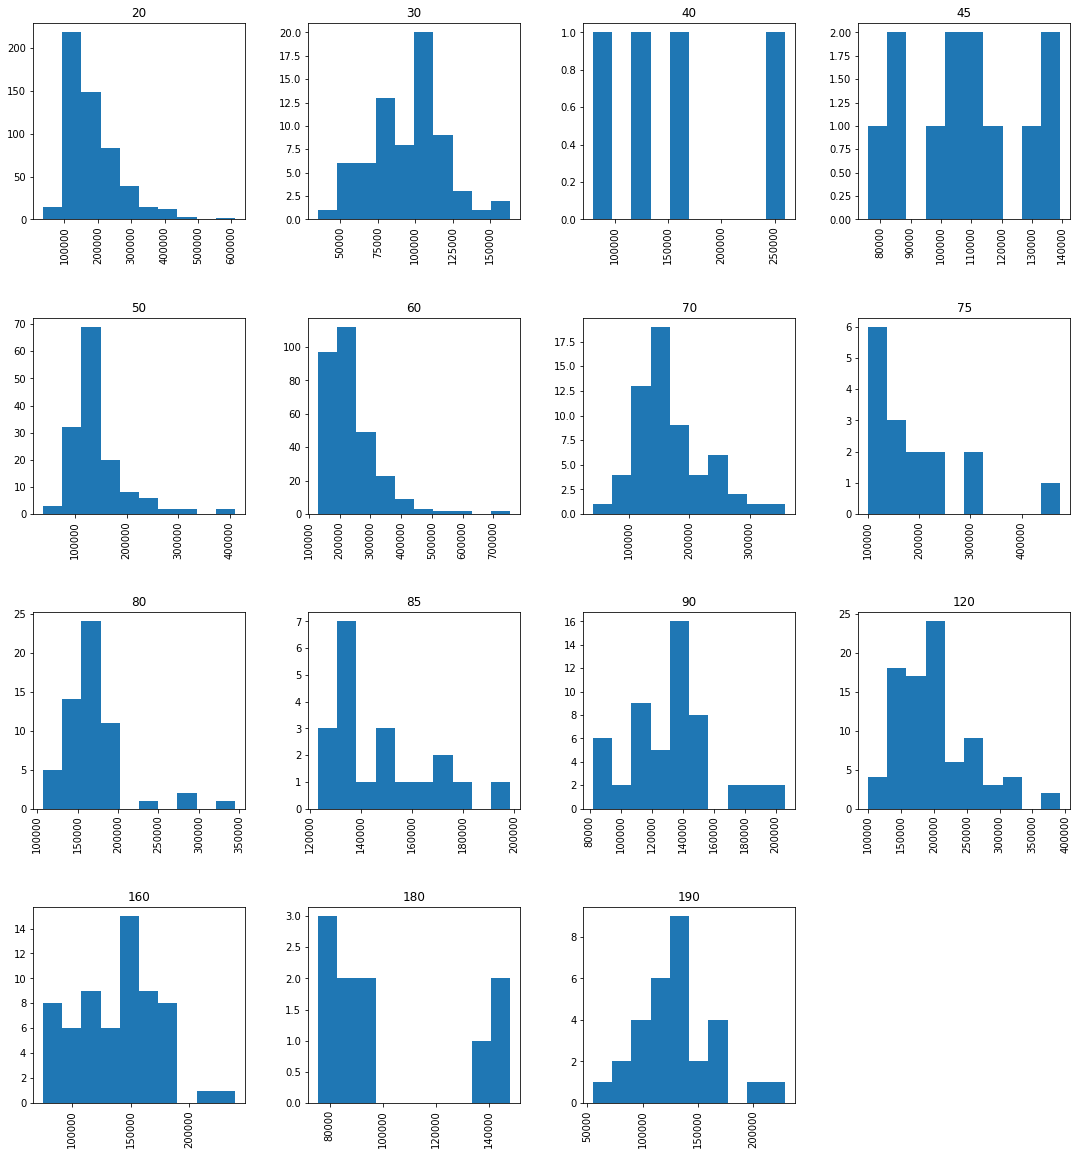

In [116]:
hist = df_train.loc[:,['MSSubClass', 'SalePrice']].hist('SalePrice', by='MSSubClass', figsize=(18,20))

## Data Preparation

In [117]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [118]:
contains_null = []
for i in df_train.columns:
    if df_train[i].isnull().any():
        print(i, df_train[i].isnull().sum())
        contains_null.append(i)

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [119]:
import sklearn
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [120]:
cat_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'SaleType',
 'SaleCondition']

# Encoding of categorical features

In [121]:
ordinal_features = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', '']

nominal_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

In [122]:
cat_features.remove('LowQualFinSF')
cat_features.remove('3SsnPorch')
cat_features.remove('PoolArea')
cat_features.remove('MiscVal')
num_features.append('LowQualFinSF')
num_features.append('3SsnPorch')
num_features.append('PoolArea')
num_features.append('MiscVal')

In [123]:
def top_10_one_hot_encoding(features, data):
    one_hot_hash = {}
    new_features = []
    for i in features:
        top_10 = [x for x in data[i].value_counts().sort_values(ascending=False).head(10).index]
        for label in top_10:
            one_hot_hash[i+ "_"+str(label)] = np.where(data[i]==label,1,0)
            new_features.append(i+ "_"+str(label))
    for i in features:
        data.drop(i, axis=1, inplace=True)
    df_new = pd.DataFrame(data=one_hot_hash)
    data = data.join(df_new)
    return data, new_features

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [80]:
len(df_train.columns)

225

In [ ]:
def miceImputation(ord_features, num_features, data):
    numeric_transformer = Pipeline(
        steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler()),]
        )
    ordinal_transformer = Pipeline(
        steps = [("imputer", SimpleImputer(strategy="most_frequent")), ("label_encoding", LabelEncoder())]
    )
    nominal_transformer = Pipeline(
        steps = [("imputer", SimpleImputer(strategy="most_frequent")), ("label_encoding", LabelEncoder())]
    )
    ct = ColumnTransformer(
        transformers=[
        ("num", numeric_transformer, num_features),
        ("ord", ordinal_transformer, ordinal_features),
        ("nom", nominal_transformer, nominal_features),
    ]
    )
    for i in 